<h1>Final Project Part 2 - EDA </h1>

<h2>Import Libraries and Loading Datasets</h2>

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
 
sns.set_style("darkgrid")      # Specifying seaborn style to use for plots/graphs

%matplotlib inline

In [39]:
#Load data into dataframe
filepath = 'assets/nifi_prometheus_metrics.csv'
nifi_metrics = pd.read_csv(filepath)

# Remove unused id and clean up column names 
nifi_metrics = nifi_metrics.drop('id',axis=1)
updated_columns = [labels.split(':')[0] for labels in nifi_metrics.columns.values]
updated_columns = np.array(updated_columns)
nifi_metrics.columns=updated_columns
nifi_metrics = nifi_metrics.set_index('time')
nifi_metrics = nifi_metrics.drop(['timestamp'],axis=1)

#Add Datetime as a feature (did not get to do this in part 1)
#convert index to datetime
nifi_metrics.index = pd.to_datetime(nifi_metrics.index)

#convert datetime to features columns
nifi_metrics.loc[:,'hour_of_day'] = nifi_metrics.index.hour 

#Confirm Shape
hourly_metrics.shape

(3849, 47)

<h2>Create Preliminary Models for Data</h2>

<h4>Modeling JVM Heap Used</h4>

In [40]:
#Create features and target columns
feature_cols = ['ActiveThreads', 'BytesReceivedLast5Minutes', 'jvmnon_heap_usage', 'jvmthread_count', 'jvmthread_statesrunnable','loadAverage1min']
target_col = ['jvmheap_used']

# Create feature and target dataframes
X = nifi_metrics.loc[:, feature_cols]
y = nifi_metrics.loc[:, target_col]

# Splitting both target and features data into a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 23)

# Creating a linear regression model instance and fitting the training data to it
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print('Test Data RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Finding RMSE
print ('Test Data MAE:', metrics.mean_absolute_error(y_test, y_pred))         # Finding MAE

# Evaluating the model 
print('Training Data R-Squared:', lr.score(X_train, y_train)) # Comparing training data to null model/finding R-Squared 
print('Test Data R-Squared:', lr.score(X_test, y_test))       # Comparing test data to null model/finding R-Squared 


Test Data RMSE: 66276669.058047056
Test Data MAE: 46695705.0385758
Training Data R-Squared: 0.5646345493976932
Test Data R-Squared: 0.5416980484718847


<h4>Observation</h4>

This model seems to demonstrate that it's perfoming better than the null value and not underfitting however may be worth an attempt to enhance the model for an improved score.  Also there appears to be slight variance when comparing the approx. 0.02 difference between the R-squared of the training data to the test data.

Given this I will attempt to adjust the underlying model to find additional features to add or perhaps enhance by raising a value to some power and applying a curve.

<h4>Adjusting model with additional features</h4>

In [41]:
feature_cols = feature_cols + ['jvmuptime','jvmthread_statestimed_waiting']

# Create feature and target dataframes
X = nifi_metrics.loc[:, feature_cols]
y = nifi_metrics.loc[:, target_col]

# Splitting both target and features data into a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 23)

# Creating a linear regression model instance and fitting the training data to it
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print('Test Data RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Finding RMSE
print ('Test Data MAE:', metrics.mean_absolute_error(y_test, y_pred))         # Finding MAE

# Evaluating the model 
print('Training Data R-Squared:', lr.score(X_train, y_train)) # Comparing training data to null model/finding R-Squared 
print('Test Data R-Squared:', lr.score(X_test, y_test))       # Comparing test data to null model/finding R-Squared 



Test Data RMSE: 63048186.57988415
Test Data MAE: 42431288.90960515
Training Data R-Squared: 0.6024792721441321
Test Data R-Squared: 0.5852603478781216


<h4>Evaluation of Models</h4>

Both models are performing better than underfitting with the second model performing better than the first when comparing the RMSE and MAE values.  The second model also performs better in comparison to the null model according to r-squared values (0.626 in second model vs 0.604).  The variance is still a difference approx 0.25 which indicates I would do better with an increased sample set (data which I can obtain through prometheus extract).


<h2>Exploring The Dataset</h2>

In [42]:
nifi_metrics.shape

(3849, 25)

In [43]:
nifi_metrics.dtypes # Find out the datatypes of each column

ActiveThreads                    float64
BytesQueued                      float64
BytesReadLast5Minutes            float64
BytesReceivedLast5Minutes        float64
BytesSentLast5Minutes            float64
BytesWrittenLast5Minutes         float64
FlowFilesQueued                  float64
FlowFilesReceivedLast5Minutes    float64
FlowFilesSentLast5Minutes        float64
TotalTaskDurationNanoSeconds     float64
TotalTaskDurationSeconds         float64
availableCores                   float64
jvmdaemon_thread_count           float64
jvmfile_descriptor_usage         float64
jvmheap_usage                    float64
jvmheap_used                     float64
jvmnon_heap_usage                float64
jvmthread_count                  float64
jvmthread_statesblocked          float64
jvmthread_statesrunnable         float64
jvmthread_statesterminated       float64
jvmthread_statestimed_waiting    float64
jvmuptime                        float64
loadAverage1min                  float64
hour_of_day     

In [44]:
nifi_metrics.describe() # Basic descriptive statistics

,ActiveThreads,BytesQueued,BytesReadLast5Minutes,BytesReceivedLast5Minutes,BytesSentLast5Minutes,BytesWrittenLast5Minutes,FlowFilesQueued,FlowFilesReceivedLast5Minutes,FlowFilesSentLast5Minutes,TotalTaskDurationNanoSeconds,...,jvmheap_used,jvmnon_heap_usage,jvmthread_count,jvmthread_statesblocked,jvmthread_statesrunnable,jvmthread_statesterminated,jvmthread_statestimed_waiting,jvmuptime,loadAverage1min,hour_of_day
count,3849.000000,3.849000e+03,3.849000e+03,3849.000000,3849.0,3.849000e+03,3849.000000,3849.000000,3849.0,3.849000e+03,...,3.849000e+03,3.849000e+03,3849.000000,3849.000000,3849.000000,3849.0,3849.000000,3849.000000,3849.000000,3849.000000
mean,1.391270,2.914680e+04,8.472894e+05,354102.388413,0.0,3.322487e+06,18.048064,1076.223175,0.0,4.197794e+09,...,3.305946e+08,-2.497209e+08,81.320083,0.004157,14.330735,0.0,48.954534,7811.052741,3.645105,12.086516
std,1.479832,3.018292e+05,2.040324e+06,142899.506159,0.0,8.363977e+06,401.766612,1290.817287,0.0,1.101747e+10,...,9.757928e+07,1.799513e+07,3.176367,0.136725,0.840437,0.0,2.362929,7960.590626,1.526329,6.779498
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000,1.000000,0.0,9.476633e+07,...,1.361799e+08,-2.675632e+08,66.000000,0.000000,13.000000,0.0,41.000000,36.000000,1.158203,0.000000
25%,0.000000,0.000000e+00,5.602620e+05,279356.000000,0.0,2.158366e+06,0.000000,775.000000,0.0,3.519467e+09,...,2.439627e+08,-2.629978e+08,81.000000,0.000000,14.000000,0.0,48.000000,1896.000000,2.850586,6.000000
50%,0.000000,0.000000e+00,8.446300e+05,421687.000000,0.0,3.244590e+06,0.000000,1176.000000,0.0,3.758088e+09,...,3.577992e+08,-2.574555e+08,82.000000,0.000000,14.000000,0.0,48.000000,8299.000000,3.703613,13.000000
75%,3.000000,4.886700e+04,8.746200e+05,437310.000000,0.0,3.362597e+06,10.000000,1198.000000,0.0,3.850678e+09,...,4.138948e+08,-2.425514e+08,82.000000,0.000000,15.000000,0.0,50.000000,8299.000000,4.495605,17.000000
max,4.000000,1.336886e+07,3.712177e+07,439041.000000,0.0,1.494957e+08,18264.000000,24965.000000,0.0,2.062455e+11,...,4.750142e+08,-1.869874e+08,90.000000,7.000000,22.000000,0.0,56.000000,37325.000000,51.120605,23.000000


In [45]:
nifi_metrics.loc[:,['BytesSentLast5Minutes', 'FlowFilesSentLast5Minutes', 'jvmthread_statesterminated']].sample(5)

,BytesSentLast5Minutes,FlowFilesSentLast5Minutes,jvmthread_statesterminated
time,,,
2019-07-24 04:11:00,0.0,0.0,0.0
2019-07-26 14:18:00,0.0,0.0,0.0
2019-07-26 03:22:00,0.0,0.0,0.0
2019-07-26 13:16:00,0.0,0.0,0.0
2019-07-24 11:17:00,0.0,0.0,0.0


<h4>Observation</h4>

All values are numerical types however BytesSentLast5Minutes, FlowFilesSentLast5Minutes, jvmthread_statesterminated have value of 0 so I will exclude those from the set (value of zero is valid for the program/flow that was running at th etime).  Also TotalTaskDurationNanoSeconds is already covered with TotalTaskDurationSeconds and jvmheap_usage is similar to jvmheap_used(or target) so will exclude those columns as well.

In [46]:
nifi_metrics = nifi_metrics.drop(columns=['BytesSentLast5Minutes', 'FlowFilesSentLast5Minutes', 'jvmthread_statesterminated','TotalTaskDurationNanoSeconds','jvmheap_usage'])

<h3>Boxplots</h3>

Using boxplotes to identify outliers in the data.  Boxplots are separated out due to varying scales

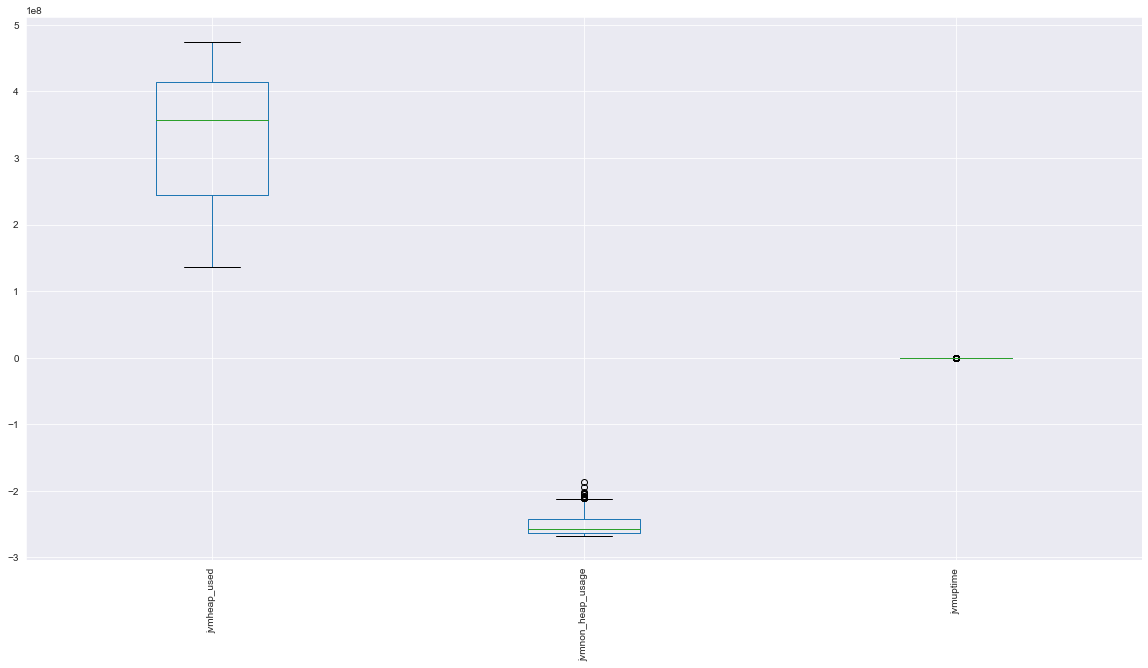

In [60]:
#Evaluating JVM Memory - Heap/Non Heap
ax = nifi_metrics.loc[:,['jvmheap_used','jvmnon_heap_usage']].plot(kind='box', figsize=(20, 10), rot=90)


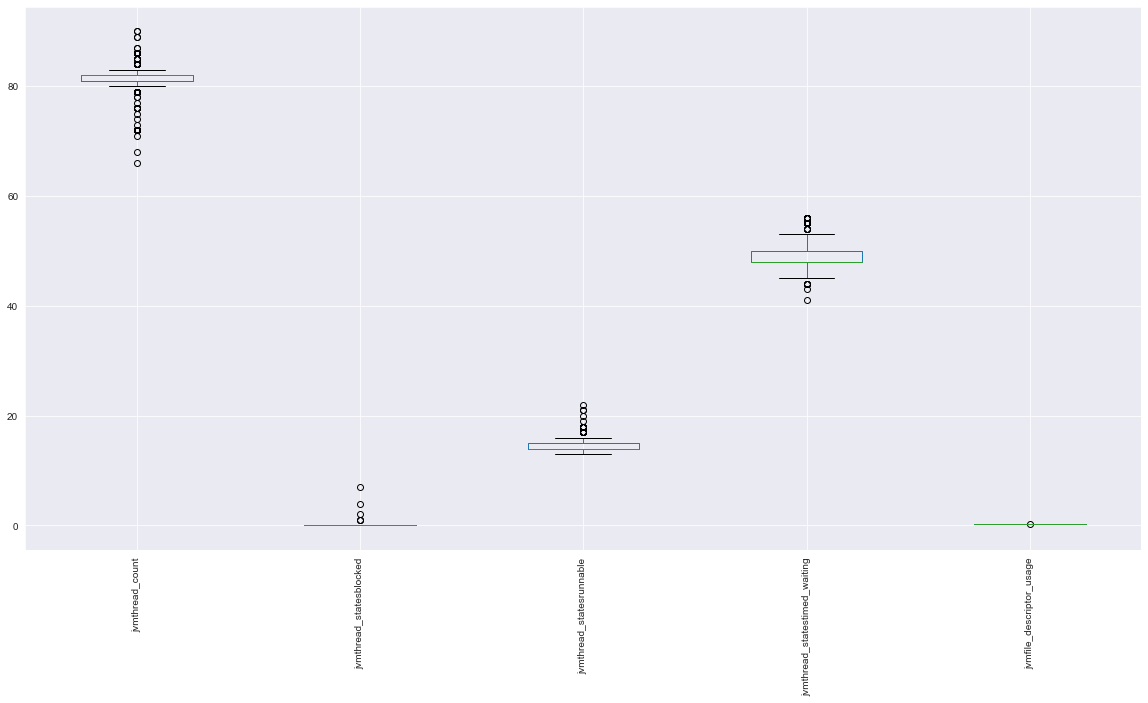

In [59]:
#Evaluating JVM Threads
ax = nifi_metrics.loc[:,['jvmthread_count','jvmthread_statesblocked','jvmthread_statesrunnable','jvmthread_statestimed_waiting','jvmfile_descriptor_usage']].plot(kind='box', figsize=(20, 10), rot=90)


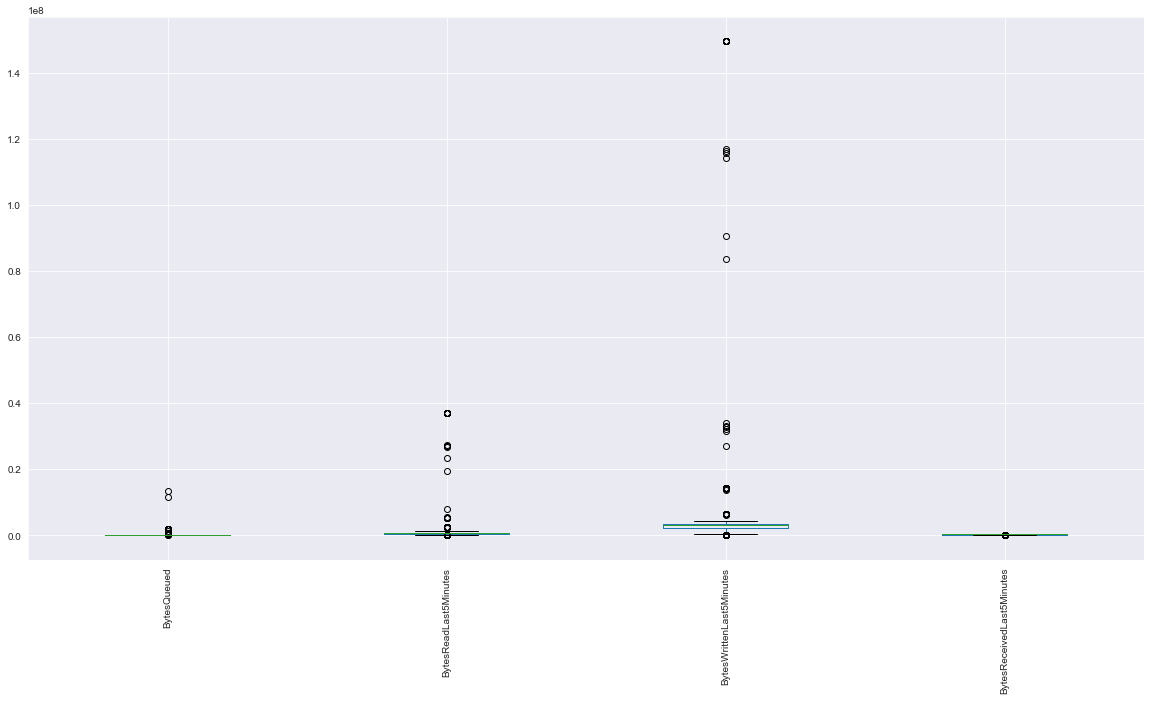

In [48]:
#Evaluating bytes related metrics
ax = nifi_metrics.loc[:,['BytesQueued','BytesReadLast5Minutes','BytesWrittenLast5Minutes','BytesReceivedLast5Minutes']].plot(kind='box', figsize=(20, 10), rot=90)


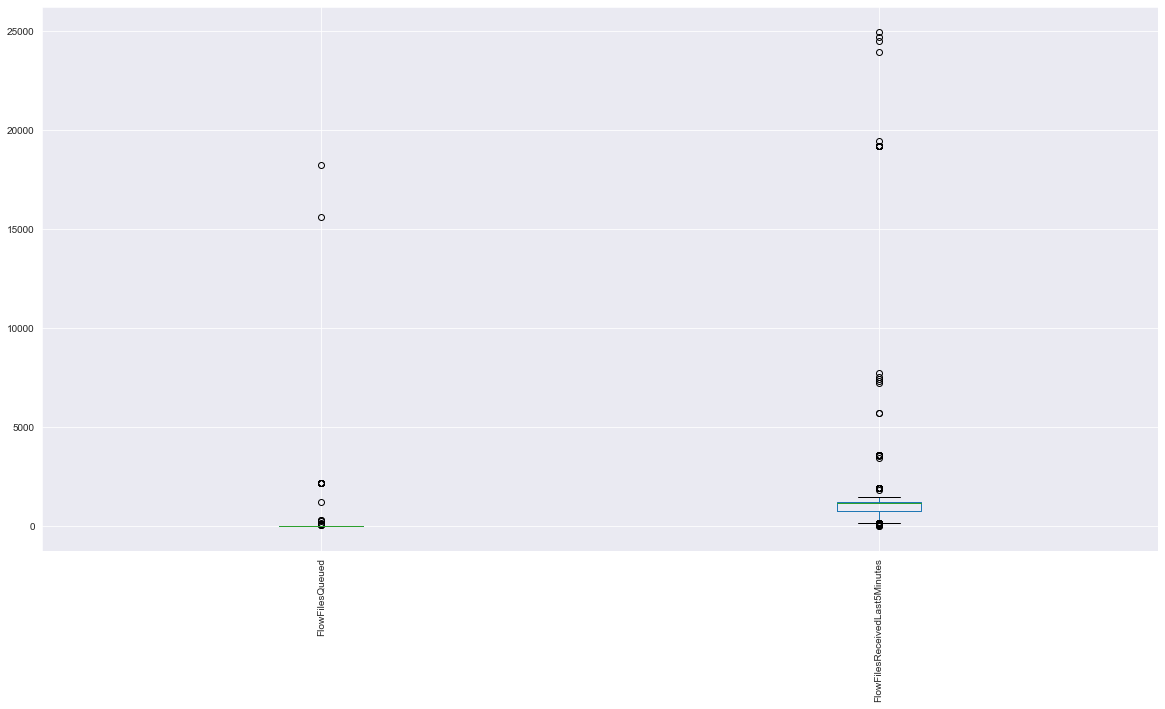

In [49]:

ax = nifi_metrics.loc[:,['FlowFilesQueued','FlowFilesReceivedLast5Minutes']].plot(kind='box', figsize=(20, 10), rot=90)


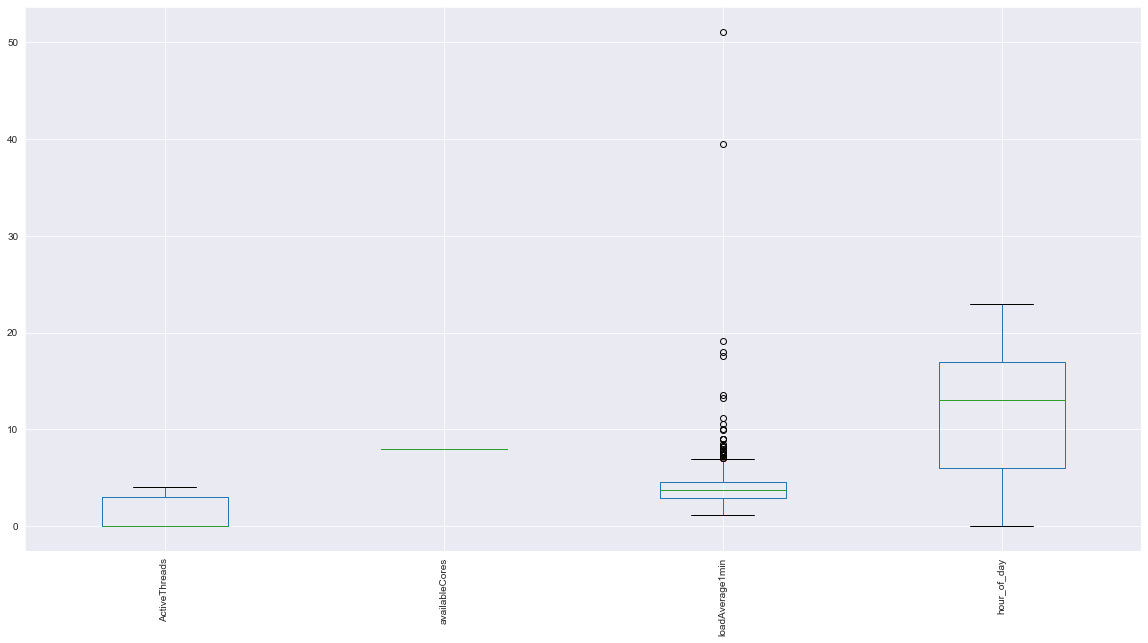

In [58]:

ax = nifi_metrics.loc[:,['ActiveThreads','availableCores','loadAverage1min','hour_of_day']].plot(kind='box', figsize=(20, 10), rot=90)


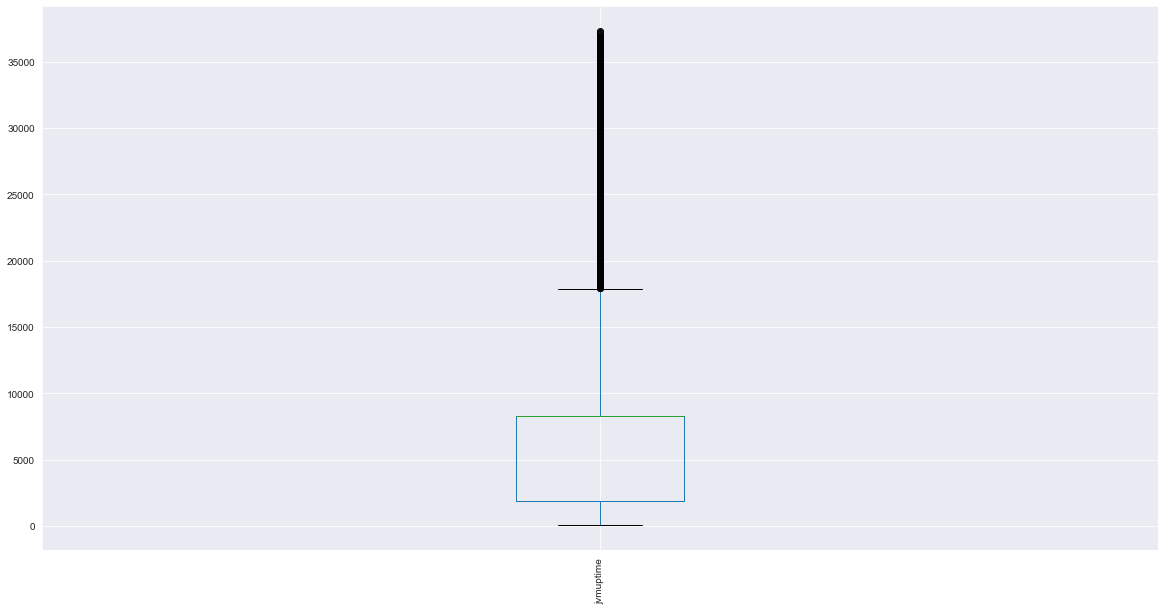

In [61]:

ax = nifi_metrics.loc[:,['jvmuptime']].plot(kind='box', figsize=(20, 10), rot=90)


<h4>Observation</h4>

Many variables shown have outliers except for ActiveThreads, availableCores(however this values appears to remain constant in data) jvmfile_descriptor_usage, hour_of_day, BytesRecievedLast5Minutes and the target variable Java Heap

<h3>Histograms</h3>

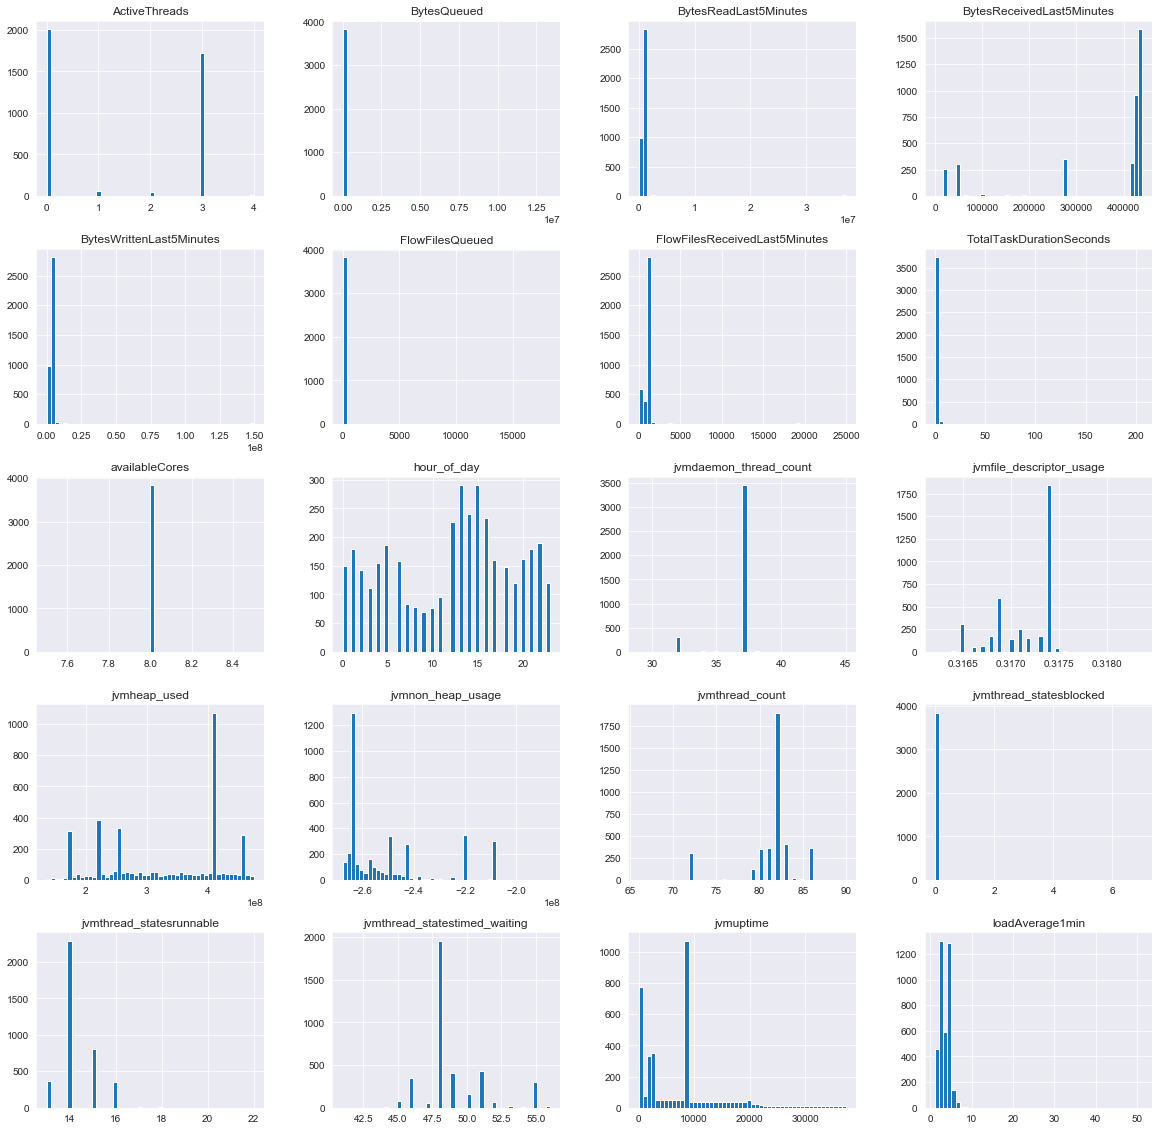

In [14]:
ax3 = nifi_metrics.hist(figsize=(20,20), bins = 50) # Visualize distributions of each column

<h4>Observation</h4>

Variables that appear to show a normal distribution are jvmthread_statestimed_waiting and perhaps jvmfile_desriptor_usage.  Variables that appear to be skewed right are jvmthread_count, jvmheap_used (target variable), and BytesReceivedLast5Minutes. Variables that appear to be unchanging are FlowFilesQueued, BytesQueued, and availableCores).

<h3>Using Seaborn To Visualize Relationships</h3>

In [62]:
#Removing constant values from dataset
updated_metrics = nifi_metrics.drop(columns=['availableCores'])

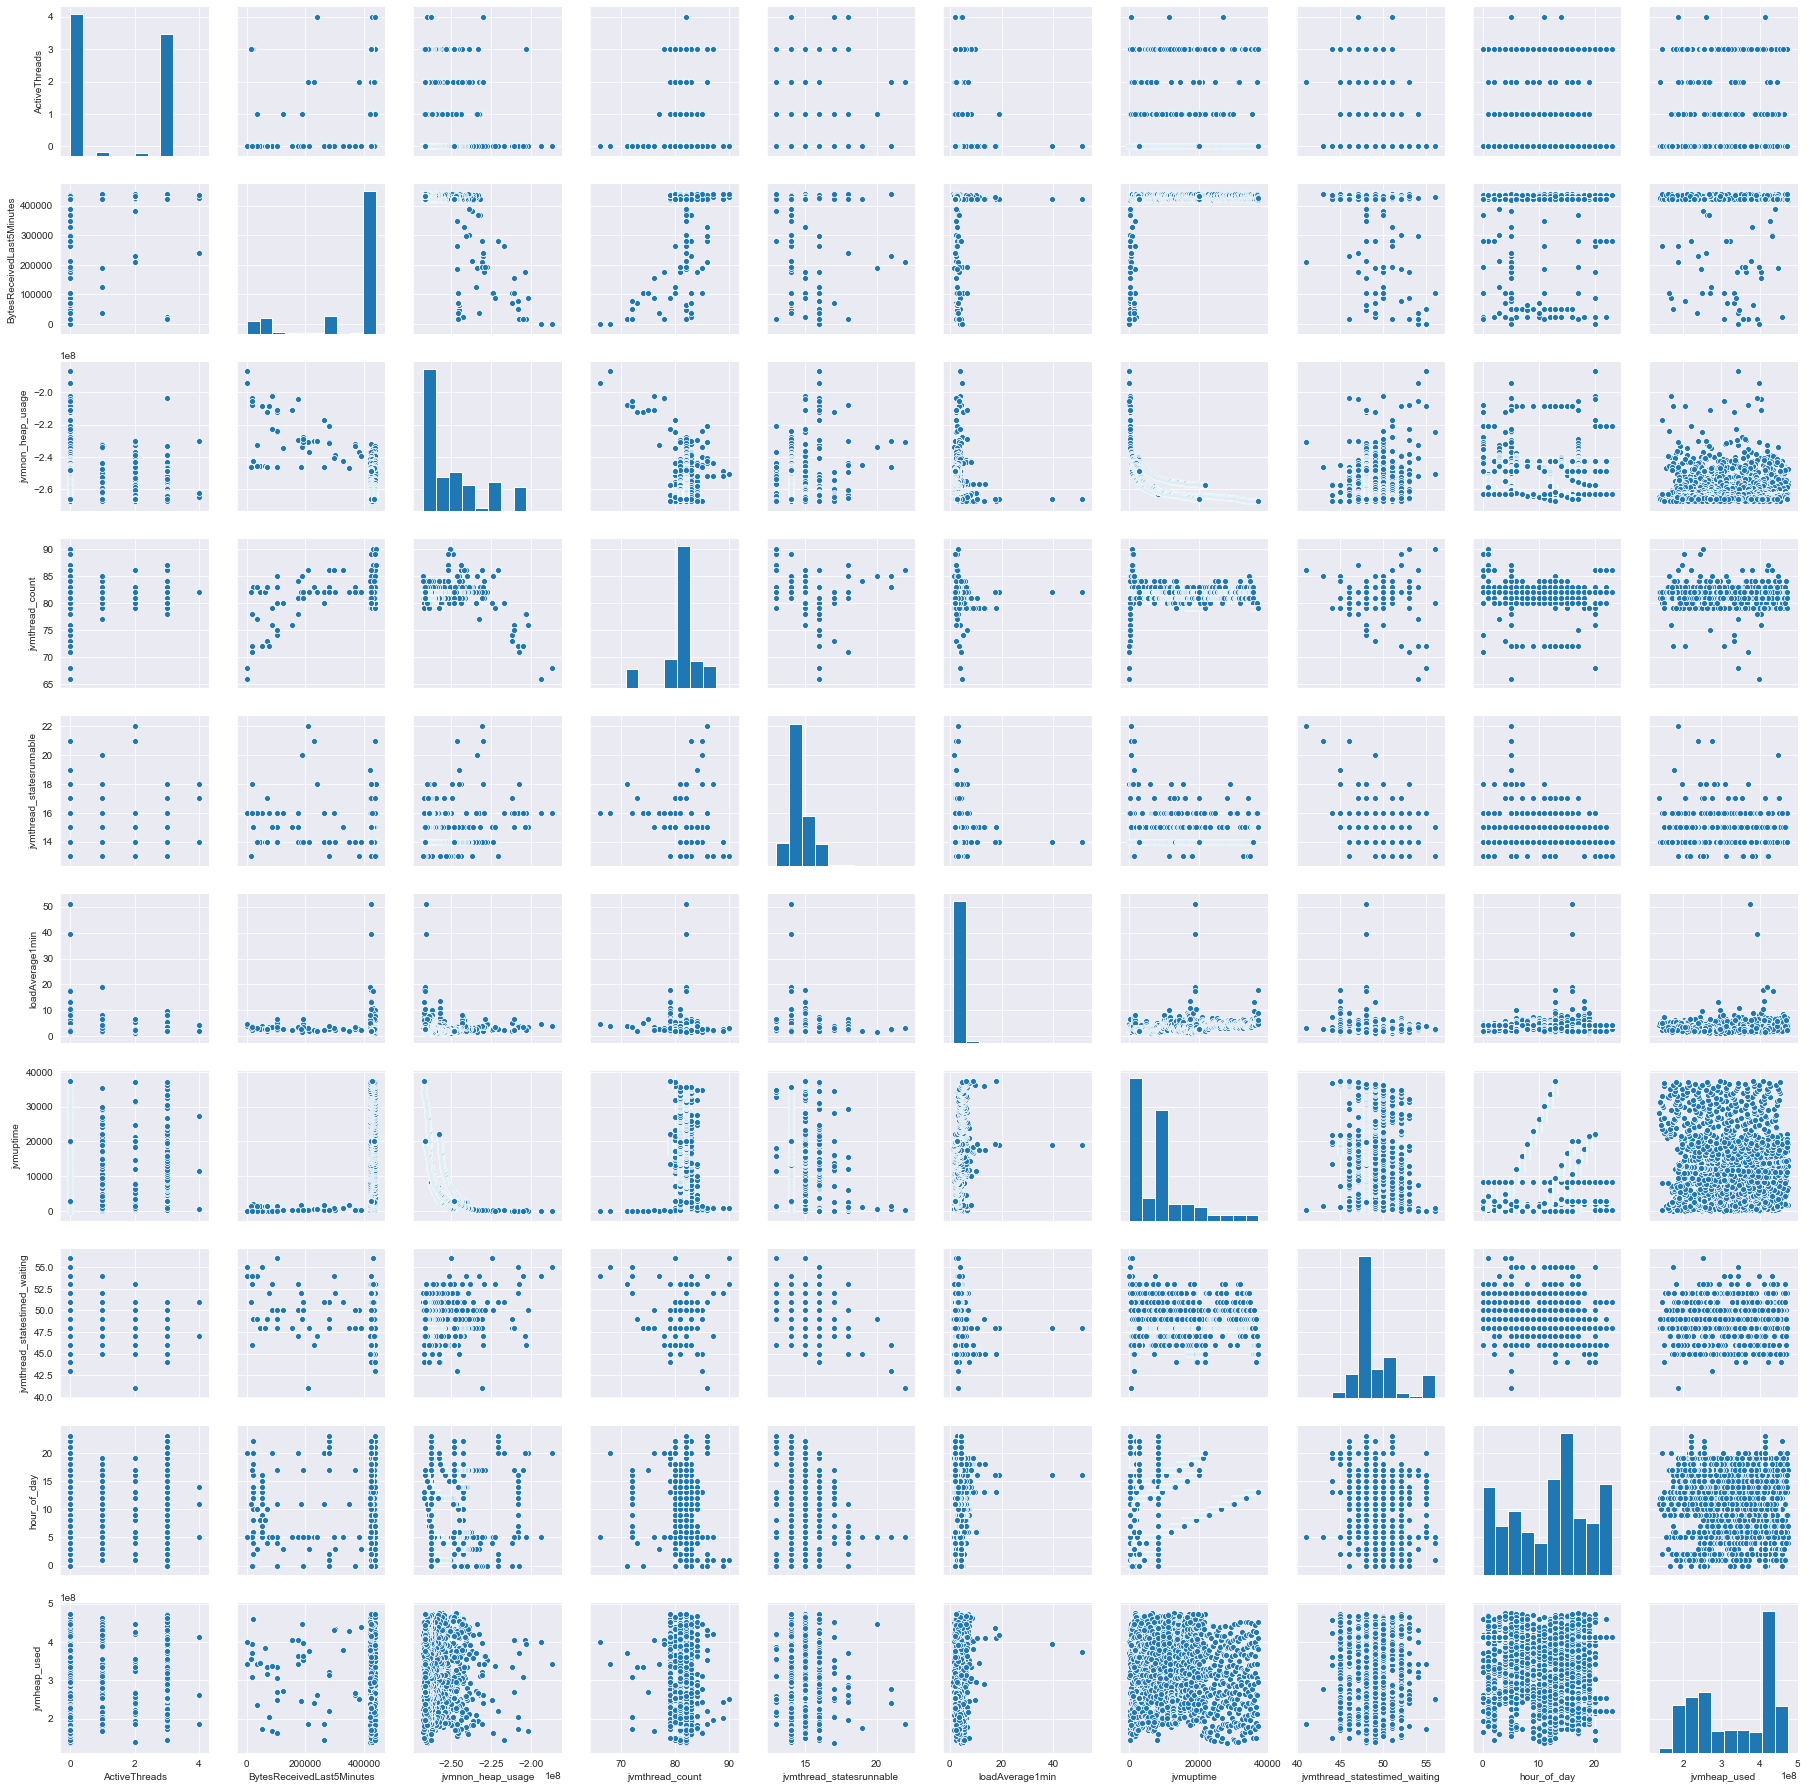

In [63]:
#Perform pairplots on variables of interest for features
correlation_vars = ['ActiveThreads', 'BytesReceivedLast5Minutes', 'jvmnon_heap_usage', 'jvmthread_count', 'jvmthread_statesrunnable','loadAverage1min','jvmuptime','jvmthread_statestimed_waiting','hour_of_day','jvmheap_used']
g = sns.pairplot(updated_metrics,vars=correlation_vars) # Create scattermatrix of all variables to visualize relationships

<h4>Observation</h4>

When reviewing the correlations on the last column to compare jvmheap_used with other targets the relationship appears to be non-linear, with perhaps an exception for loadAverage1min (who's outliers for higher loadAverage1Min values have higher values for jvmheap_used. 

When comparing against features jvmthread_count and BytesReceivedLast5Minutes appear to have a positive colinearity. jvmnon_heap_usage and jvmthread_count has a negative colinearity. Also jvmthead_count and ActiveThreads appear to have positive colinearity.  All of these indicates opportunities to remove unneeded features (to avoid colinearity).



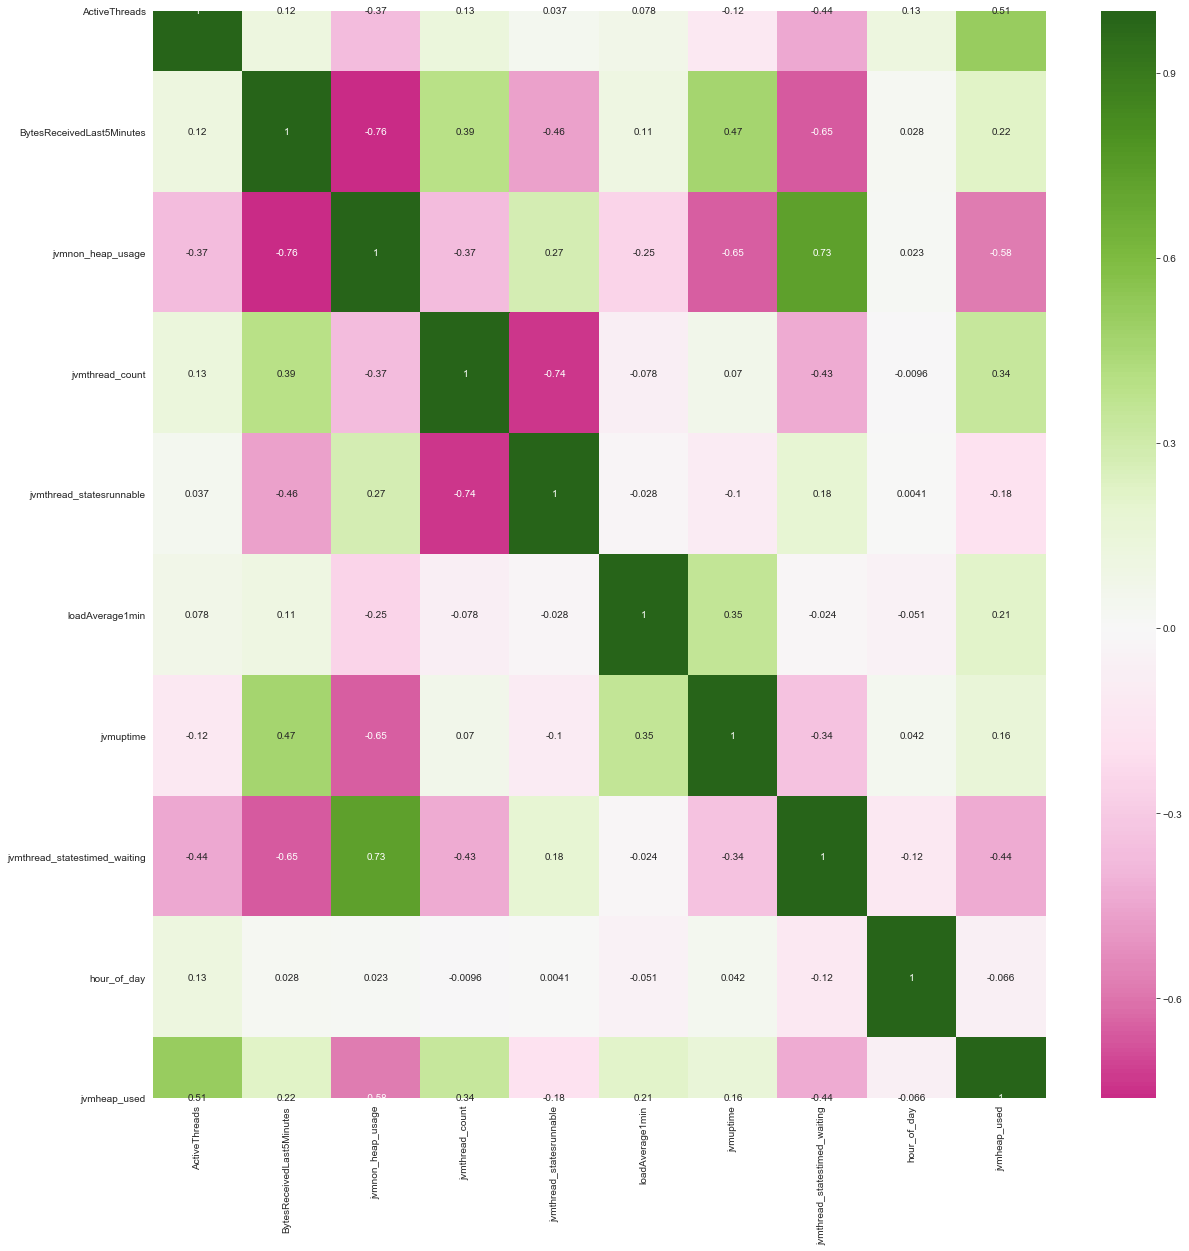

In [23]:
# Create an annotated heatmap to visualize the correlation relationships between variables

fig, ax4 = plt.subplots(figsize=(20,20)) 
correlation_matrix = updated_metrics.loc[:,correlation_vars]
sns.heatmap(correlation_matrix.corr(), center=0, cmap="PiYG", annot = True, ax = ax4);

<h5>Observation</h5>

The matric aboves appears to confirm what was observed in the pairplots.  As expected jvmheap_used has a higher positive correalation with ActiveThreads and BytesReceivedLast5Minutes (considering more active thread or more bytes recieved would require more heap). Was a bit surprised to see a higher negative correlation with jvmnon_heap_usage (with it being a separate area in jvm memory I didn't think it would necessary show as a correlation).

<h2>Final Observations and Analysis</h2>

This data set has 3849 observation with 24 columns (in original data) and 1 engineered column for hour of day.  The target variable of focus in this data is jvmheap_used. The data did not contain missing values.

The main shortcoming is only one variable seemed to have a linear relationship with the data (load1MinAverage) however it didn't have the strongest correlation compared to ActiveTheads or BytesReceivedLast5Min (which appeared to have non-linear relationships).  The R squared values are above .5 yet the score do indicate plenty of room for improvement, perhaps by a non-linear model.

Things I will do to improve this model include:

1) Removing unnecessary features due to colinearity 

2) Try non-linear models

3) Perform cross-validation with KFold for training and test splits

4) Break out hour of day feature into dummy variables and assess (via correlation) if those are worth including

5) Obtain more data to reduce variance in model

I think using R-squared model is a good scoring value to use moving forward since I will continue with regression modeling (considering JVM Heap memory used would be a numerical/continuos value). Also will lean more on RMSE because for memory because we want to be as efficient as possible when making a decision to allocate or deallocate memory based on the prediction
